# Prepare rules for the all the data sets 
1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
2) Change the minimum length in apriori algorithm
3) Visulize the obtained rules using different plots 


In [28]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from scipy.special import comb
from itertools import combinations, permutations
from mlxtend.frequent_patterns import apriori, association_rules
import scipy as sp
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder

In [3]:
!pip install mlxtend


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



     ---------------------------------------- 1.3/1.3 MB 2.9 MB/s eta 0:00:00


In [9]:
import os

In [10]:
os.getcwd()

'C:\\Users\\Sureksha\\Downloads'

In [11]:
os.chdir('E:\DS ASSIGNMENTS\9.Association Rule')

In [13]:
os.listdir()

['book.csv', 'my_movies.csv', 'Problem_Statment.txt']

In [14]:
book=pd.read_csv('book.csv')

In [15]:
book.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [16]:
book.shape

(2000, 11)

In [19]:
df1 = book.copy()
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
ChildBks,2000.0,0.4230,0.494159,0.0,0.0,0.0,1.0,1.0
YouthBks,2000.0,0.2475,0.431668,0.0,0.0,0.0,0.0,1.0
CookBks,2000.0,0.4310,0.495340,0.0,0.0,0.0,1.0,1.0
DoItYBks,2000.0,0.2820,0.450086,0.0,0.0,0.0,1.0,1.0
RefBks,2000.0,0.2145,0.410578,0.0,0.0,0.0,0.0,1.0
ArtBks,2000.0,0.2410,0.427797,0.0,0.0,0.0,0.0,1.0
GeogBks,2000.0,0.2760,0.447129,0.0,0.0,0.0,1.0,1.0
ItalCook,2000.0,0.1135,0.317282,0.0,0.0,0.0,0.0,1.0
ItalAtlas,2000.0,0.0370,0.188809,0.0,0.0,0.0,0.0,1.0
ItalArt,2000.0,0.0485,0.214874,0.0,0.0,0.0,0.0,1.0


In [20]:
df1.isnull().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

In [21]:
df1.dtypes

ChildBks     int64
YouthBks     int64
CookBks      int64
DoItYBks     int64
RefBks       int64
ArtBks       int64
GeogBks      int64
ItalCook     int64
ItalAtlas    int64
ItalArt      int64
Florence     int64
dtype: object

In [22]:
df1.shape

(2000, 11)

In [23]:
item_sets = {}

In [29]:
te=TransactionEncoder()
te

TransactionEncoder()

In [30]:
te_ary = te.fit(df1).transform(df1)
te_ary

array([[False,  True,  True, ...,  True, False, False],
       [False,  True, False, ...,  True,  True,  True],
       [False,  True,  True, ...,  True, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [31]:
ap = pd.DataFrame(te_ary, columns=te.columns_)
ap

,A,B,C,D,F,G,I,R,Y,a,...,h,i,k,l,n,o,r,s,t,u
0,False,True,True,False,False,False,False,False,False,False,...,True,True,True,True,False,False,False,True,False,False
1,False,True,False,False,False,False,False,False,True,False,...,True,False,True,False,False,True,False,True,True,True
2,False,True,True,False,False,False,False,False,False,False,...,False,False,True,False,False,True,False,True,False,False
3,False,True,False,True,False,False,True,False,True,False,...,False,False,True,False,False,True,False,True,True,False
4,False,True,False,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


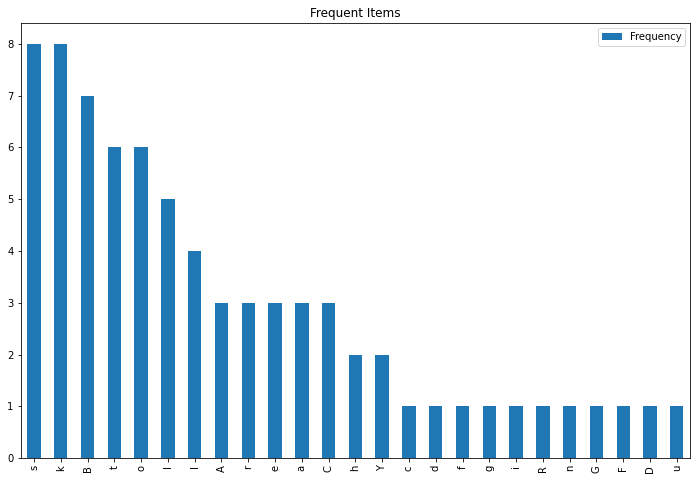

In [32]:
ap.sum().to_frame('Frequency').sort_values('Frequency',ascending=False)[:25].plot(kind='bar',
                                                                                  figsize=(12,8),
                                                                                  title="Frequent Items")
plt.show()

# Apriori Algorithm


In [33]:
ap_0_5 = {}
ap_1 = {}
ap_5 = {}
ap_1_0 = {}

In [34]:
confidence = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

In [35]:
def gen_rules(df,confidence,support):
    ap = {}
    for i in confidence:
        ap_i =apriori(df1,support,True)
        rule= association_rules(ap_i,min_threshold=i)
        ap[i] = len(rule.antecedents)
    return pd.Series(ap).to_frame("Support: %s"%support)

In [36]:
confs = []
for i in [0.001,0.005,0.01,0.05,0.1]:
    ap_i = gen_rules(ap,confidence=confidence,support=i)
    confs.append(ap_i)

C:\Users\Sureksha\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\Sureksha\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\Sureksha\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\Sureksha\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-b

C:\Users\Sureksha\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\Sureksha\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\Sureksha\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\Sureksha\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-b

In [37]:
all_conf = pd.concat(confs,axis=1)
all_conf

,Support: 0.001,Support: 0.005,Support: 0.01,Support: 0.05,Support: 0.1
0.1,110800,26603,9079,662,100
0.2,75765,20533,7156,599,100
0.3,54271,15735,5532,478,89
0.4,41693,11771,4285,371,70
0.5,32173,8981,3272,260,49
0.6,21440,5582,2179,135,30
0.7,12983,3818,1459,87,19
0.8,9918,2750,1004,62,6
0.9,7409,1657,563,10,1


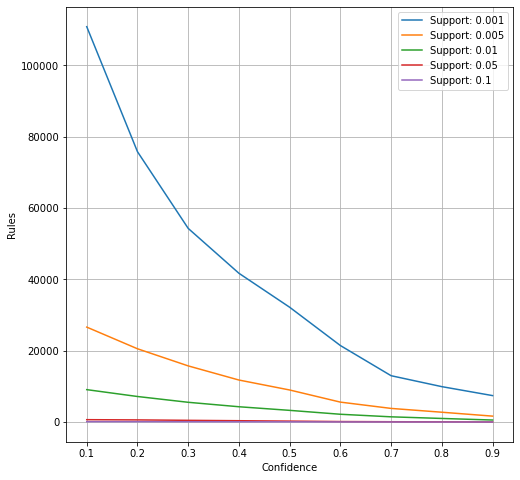

In [38]:
all_conf.plot(figsize=(8,8),grid=True)
plt.ylabel('Rules')
plt.xlabel('Confidence')
plt.show()

# Conclusion
As shown in above graph

1)Lower the Confidence level Higher the no. of rules.
2)Higher the Support, lower the no. of rules.

Lets try with Support 0.01 and Confidence at 0.4

In [40]:
ap_final =  apriori(ap,0.001,True)
ap_final

,support,itemsets
0,0.0015,(A)
1,0.0035,(B)
2,0.0015,(C)
3,0.0020,(I)
4,0.0010,(Y)
...,...,...
135,0.0010,"(Y, B, k, t, s)"
136,0.0010,"(Y, B, t, o, s)"
137,0.0010,"(B, k, t, o, s)"
138,0.0010,"(Y, k, t, o, s)"


In [41]:
rules_final = association_rules(ap_final,min_threshold=.4,support_only=False)

In [42]:
rules_final[rules_final['confidence'] > 0.5]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(A),(I),0.0015,0.0020,0.001,0.666667,333.333333,0.000997,2.9940
2,(a),(A),0.0015,0.0015,0.001,0.666667,444.444444,0.000998,2.9955
3,(A),(a),0.0015,0.0015,0.001,0.666667,444.444444,0.000998,2.9955
5,(A),(l),0.0015,0.0025,0.001,0.666667,266.666667,0.000996,2.9925
6,(r),(A),0.0015,0.0015,0.001,0.666667,444.444444,0.000998,2.9955
...,...,...,...,...,...,...,...,...,...
738,"(Y, o)","(k, B, t, s)",0.0010,0.0015,0.001,1.000000,666.666667,0.000999,inf
739,"(Y, s)","(k, B, t, o)",0.0010,0.0010,0.001,1.000000,1000.000000,0.000999,inf
740,"(B, t)","(k, Y, o, s)",0.0015,0.0010,0.001,0.666667,666.666667,0.000999,2.9970
744,"(t, o)","(k, B, Y, s)",0.0015,0.0010,0.001,0.666667,666.666667,0.000999,2.9970


In [43]:
support = rules_final["support"]
confidence =  rules_final["confidence"]
lift = rules_final["lift"]

Text(0.5, 0, 'lift')

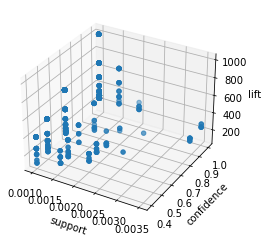

In [44]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection = '3d')
ax1.scatter(support,confidence,lift)
ax1.set_xlabel("support")
ax1.set_ylabel("confidence")
ax1.set_zlabel("lift")

Text(0, 0.5, 'confidence')

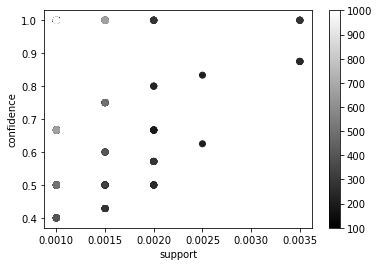

In [45]:
plt.scatter(support,confidence, c =lift, cmap = 'gray')
plt.colorbar()
plt.xlabel("support");plt.ylabel("confidence")

# MY MOVIES

In [46]:
df=pd.read_csv('my_movies.csv')
df.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [47]:
df1 = df.iloc[:,5:]
df1.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0


In [48]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Sixth Sense,10.0,0.6,0.516398,0.0,0.00,1.0,1.0,1.0
Gladiator,10.0,0.7,0.483046,0.0,0.25,1.0,1.0,1.0
LOTR1,10.0,0.2,0.421637,0.0,0.00,0.0,0.0,1.0
Harry Potter1,10.0,0.2,0.421637,0.0,0.00,0.0,0.0,1.0
Patriot,10.0,0.6,0.516398,0.0,0.00,1.0,1.0,1.0
LOTR2,10.0,0.2,0.421637,0.0,0.00,0.0,0.0,1.0
Harry Potter2,10.0,0.1,0.316228,0.0,0.00,0.0,0.0,1.0
LOTR,10.0,0.1,0.316228,0.0,0.00,0.0,0.0,1.0
Braveheart,10.0,0.1,0.316228,0.0,0.00,0.0,0.0,1.0
Green Mile,10.0,0.2,0.421637,0.0,0.00,0.0,0.0,1.0


In [49]:
df1.isnull().sum()

Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

In [50]:
df1.dtypes

Sixth Sense      int64
Gladiator        int64
LOTR1            int64
Harry Potter1    int64
Patriot          int64
LOTR2            int64
Harry Potter2    int64
LOTR             int64
Braveheart       int64
Green Mile       int64
dtype: object

In [51]:
df1.shape

(10, 10)

In [52]:
item_sets = {}
item_sets

{}

In [53]:
te = TransactionEncoder()
te

TransactionEncoder()

In [54]:
te_ary = te.fit(df1).transform(df1)
te_ary

array([[ True, False, False, False, False, False, False, False, False,
        False, False,  True, False, False, False,  True,  True,  True,
        False,  True, False, False,  True,  True, False,  True, False],
       [False, False, False, False,  True, False, False, False, False,
        False, False, False, False,  True,  True, False, False,  True,
         True, False,  True,  True, False,  True, False, False, False],
       [False,  True, False, False, False, False,  True, False,  True,
        False,  True, False,  True, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False],
       [ True,  True, False, False, False,  True, False, False, False,
         True, False, False, False,  True, False,  True, False, False,
        False, False,  True,  True, False,  True, False, False,  True],
       [False, False, False, False, False, False, False, False, False,
         True, False, False, False,  True, False, False, False,  True,
  

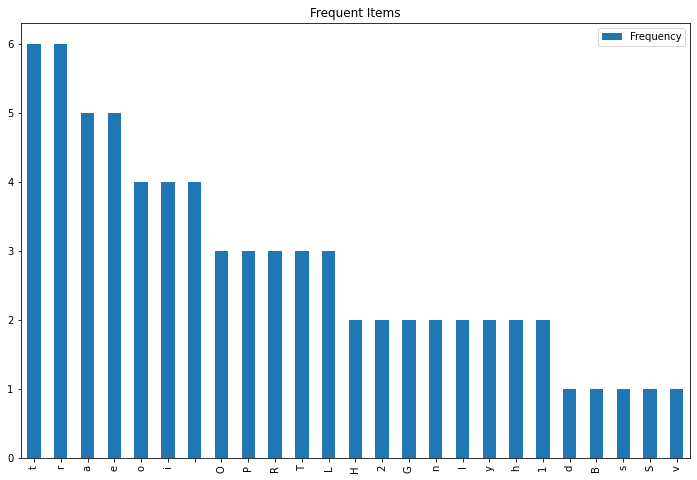

In [55]:
ap = pd.DataFrame(te_ary, columns=te.columns_)
ap.sum().to_frame('Frequency').sort_values('Frequency',ascending=False)[:25].plot(kind='bar',
                                                                                  figsize=(12,8),
                                                                                  title="Frequent Items")
plt.show()

# Apriori algorithm

In [56]:
ap_0_5 = {}
ap_1 = {}
ap_5 = {}
ap_1_0 = {}

In [57]:
confidence = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
def gen_rules(df,confidence,support):
    ap = {}
    for i in confidence:
        ap_i =apriori(df1,support,True)
        rule= association_rules(ap_i,min_threshold=i)
        ap[i] = len(rule.antecedents)
    return pd.Series(ap).to_frame("Support: %s"%support)

In [58]:
confs = []
for i in [0.005,0.001,0.003,0.007]:
    ap_i = gen_rules(ap,confidence=confidence,support=i)
    confs.append(ap_i)

C:\Users\Sureksha\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\Sureksha\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\Sureksha\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\Sureksha\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-b

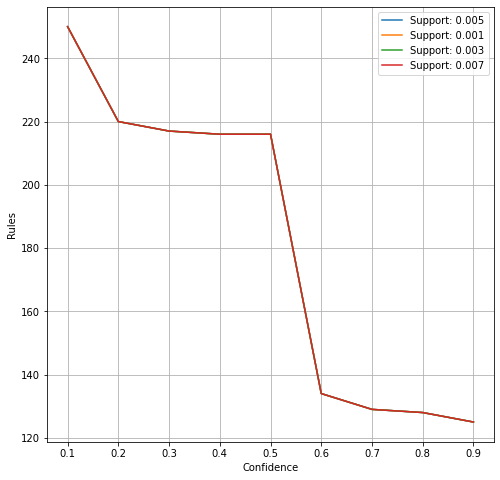

In [59]:
all_conf = pd.concat(confs,axis=1)
all_conf.plot(figsize=(8,8),grid=True)
plt.ylabel('Rules')
plt.xlabel('Confidence')
plt.show()

# Conclusiom
As shown in above graph

1)Lower the Confidence level Higher the no. of rules.
2)Higher the Support, lower the no. of rules.

Lets try with Support 0.005 and Confidence at 0.4

In [60]:
ap_final =  apriori(ap,0.005,True)
ap_final

,support,itemsets
0,0.4,( )
1,0.2,(1)
2,0.2,(2)
3,0.1,(B)
4,0.2,(G)
...,...,...
2664,0.1,"(i, e, h, x, t, s, n, S, )"
2665,0.1,"(H, P, r, y, 1, e, t, o, a)"
2666,0.1,"(H, P, r, y, e, 2, t, o, a)"
2667,0.1,"(H, P, r, y, 1, e, t, o, a, )"


In [61]:
rules_final = association_rules(ap_final,min_threshold=.4,support_only=False)
rules_final[rules_final['confidence'] > 0.5]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(H),( ),0.2,0.4,0.2,1.000000,2.500000,0.12,inf
5,(M),( ),0.1,0.4,0.1,1.000000,2.500000,0.06,inf
6,(P),( ),0.3,0.4,0.2,0.666667,1.666667,0.08,1.8
8,(S),( ),0.1,0.4,0.1,1.000000,2.500000,0.06,inf
11,(e),( ),0.5,0.4,0.4,0.800000,2.000000,0.20,3.0
...,...,...,...,...,...,...,...,...,...
113720,"(2, e)","(H, P, r, y, t, o, a, )",0.1,0.2,0.1,1.000000,5.000000,0.08,inf
113722,"(2, t)","(H, P, r, y, e, o, a, )",0.1,0.2,0.1,1.000000,5.000000,0.08,inf
113723,"(2, o)","(H, P, r, y, e, t, a, )",0.1,0.2,0.1,1.000000,5.000000,0.08,inf
113724,"(2, a)","(H, P, r, y, e, t, o, )",0.1,0.2,0.1,1.000000,5.000000,0.08,inf


In [62]:
support = rules_final["support"]
confidence =  rules_final["confidence"]
lift = rules_final["lift"]

Text(0.5, 0, 'lift')

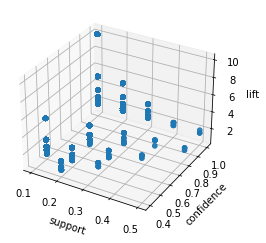

In [63]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection = '3d')
ax1.scatter(support,confidence,lift)
ax1.set_xlabel("support")
ax1.set_ylabel("confidence")
ax1.set_zlabel("lift")

Text(0, 0.5, 'confidence')

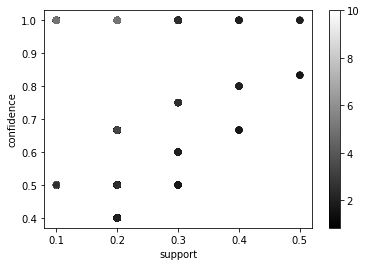

In [64]:
plt.scatter(support,confidence, c =lift, cmap = 'gray')
plt.colorbar()
plt.xlabel("support");plt.ylabel("confidence")